# Análise de Dados Descritiva: exportações de Minas Gerais à China entre 2013 e 2022

##### # Importando módulos

In [780]:
import seaborn as sns  
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

##### # Conectando ao MySQL

In [781]:
dados = mysql.connector.connect(host="localhost", user="root", passwd="Anhanga123@", database="exportacao")
print(dados)

## Passo I: Importando a base de dados

In [782]:
meu_cursor = dados.cursor()
meu_cursor.execute('SELECT * FROM exportacao_a_china')
dados_importados = meu_cursor.fetchall()
exp_china = pd.DataFrame(dados_importados)

pib_mg = pd.read_excel('dados/PIB_MG.xlsx')

exp_china.head()

,0,1,2,3,4,5,6
0,1,2022,China,33,"Petróleo, produtos petrolíferos e materiais re...",Rio de Janeiro,1.386340e+10
1,2,2022,China,28,Minérios metálicos e sucata,Pará,9.645230e+09
2,3,2022,China,28,Minérios metálicos e sucata,Minas Gerais,8.477050e+09
3,4,2022,China,22,Sementes e frutos oleaginosos,Mato Grosso,8.288290e+09
4,5,2022,China,22,Sementes e frutos oleaginosos,Goiás,5.026350e+09


In [783]:
pib_mg.head()

,ANO,PIB
0,2022,950800000000
1,2021,805500000000
2,2020,682786000000
3,2019,651870000000
4,2018,614876000000


## Passo II: Tratando e entendendo a base de dados 

In [784]:
exp_china.dtypes

0      int64
1      int64
2     object
3      int64
4     object
5     object
6    float64
dtype: object

In [785]:
exp_china.shape

(6166, 7)

In [786]:
exp_china.isnull().sum().sum()

0

In [787]:
exp_china.drop(exp_china[[0, 2, 3]], axis = 1, inplace=True)

In [788]:
novo_nome = {1:'Ano', 4:'Produto', 5:'UF', 6:'Valor US$'}

In [789]:
exp_china.rename(columns = novo_nome, inplace=True)
exp_china.head(1)

,Ano,Produto,UF,Valor US$
0,2022,"Petróleo, produtos petrolíferos e materiais re...",Rio de Janeiro,1.386340e+10


In [790]:
exp_china.Produto.unique()

array(['Petróleo, produtos petrolíferos e materiais relacionados',
       'Minérios metálicos e sucata', 'Sementes e frutos oleaginosos',
       'Carne e preparações de carne',
       'Açúcares, preparações de açúcar e mel', 'Ferro e aço',
       'Celulose e resíduos de papel',
       'Fibras têxteis(exc. tops de lã e outra lã penteada)e seus resíduos(não transformados em fios/tecido)',
       'Tabaco e suas manufaturas',
       'Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas',
       'Gorduras e óleos vegetais, em bruto, refinados ou fracionados',
       'Cereais e preparações de cereais',
       'Produtos farmacêuticos e medicinais ',
       'Máquinas em geral e equipamentos industriais, n.e.p., e peças de máquinas, n.e.p.',
       'Produtos químicos orgânicos', 'Cortiça e madeira',
       'Vegetais e frutas', 'Produtos químicos inorgânicos',
       'Máquinas e equipamentos de geração de energia',
       'Couro, couro, n.e.p., e peles finas 

In [791]:
exp_china.UF.unique()

array(['Rio de Janeiro', 'Pará', 'Minas Gerais', 'Mato Grosso', 'Goiás',
       'Rio Grande do Sul', 'São Paulo', 'Paraná', 'Bahia',
       'Mato Grosso do Sul', 'Maranhão', 'Tocantins', 'Santa Catarina',
       'Piauí', 'Rondônia', 'Espírito Santo', 'Não Declarada',
       'Distrito Federal', 'Amazonas', 'Alagoas', 'Pernambuco', 'Roraima',
       'Amapá', 'Ceará', 'Paraíba', 'Rio Grande do Norte', 'Sergipe',
       'Acre', 'Reexportação', 'Mercadoria Nacionalizada',
       'Consumo de Bordo', 'Zona Não Declarada'], dtype=object)

## Passo III: Analisando e visualizando os dados

In [792]:
total_2022 = exp_china.query('Ano == 2022')['Valor US$'].sum()
total_2021 = exp_china.query('Ano == 2021')['Valor US$'].sum()
total_2020 = exp_china.query('Ano == 2020')['Valor US$'].sum()
total_2019 = exp_china.query('Ano == 2019')['Valor US$'].sum()
total_2018 = exp_china.query('Ano == 2018')['Valor US$'].sum()
total_2017 = exp_china.query('Ano == 2017')['Valor US$'].sum()
total_2016 = exp_china.query('Ano == 2016')['Valor US$'].sum()
total_2015 = exp_china.query('Ano == 2015')['Valor US$'].sum()
total_2014 = exp_china.query('Ano == 2014')['Valor US$'].sum()
total_2013 = exp_china.query('Ano == 2013')['Valor US$'].sum()

In [793]:
serie_anual_br = pd.DataFrame({
    "Ano":[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Soma anual":[total_2013, total_2014, total_2015, total_2016, total_2017, total_2018, total_2019, total_2020, total_2021, total_2022]
})

serie_anual_br

,Ano,Soma anual
0,2013,4.602319e+10
1,2014,4.061187e+10
2,2015,3.515535e+10
3,2016,3.513332e+10
4,2017,4.748843e+10
5,2018,6.392959e+10
6,2019,6.335751e+10
7,2020,6.778809e+10
8,2021,8.790795e+10
9,2022,8.942774e+10


##### # Definindo uma função para criar um gráfico de linha de série temporal 

In [794]:
def serie_temporal_exportacao(base_dados, eixo_x, eixo_y, titulo, titulo_x, titulo_y):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = eixo_x, y = eixo_y, data=base_dados)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, fontsize = 18)
    ax.set_xlabel(titulo_x, fontsize = 14)
    ax.set_ylabel(titulo_y, fontsize = 14)
    ax = ax

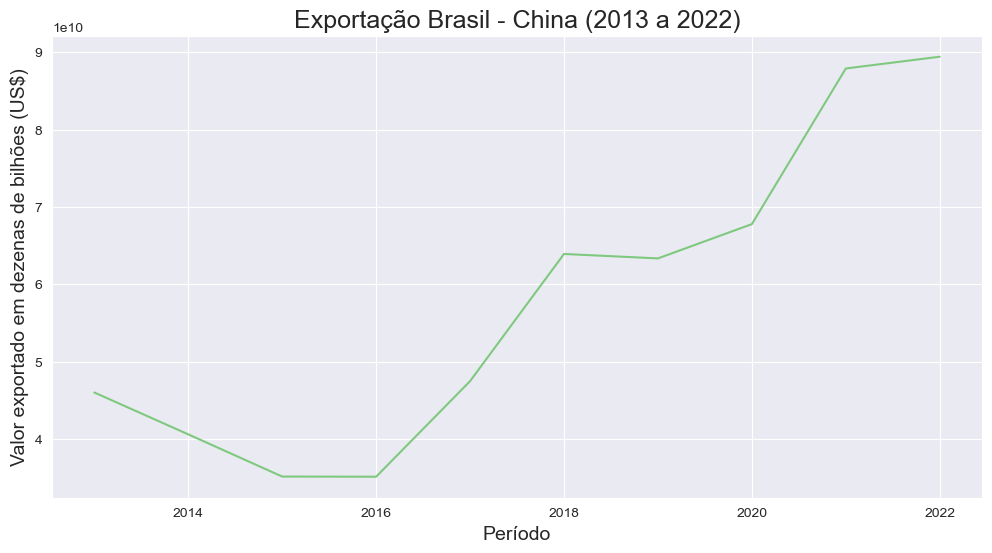

In [795]:
serie_temporal_exportacao(serie_anual_br, 'Ano', 'Soma anual', 'Exportação Brasil - China (2013 a 2022)', 'Período', 'Valor exportado em dezenas de bilhões (US$)')

### Obervação I: Houve um crescimento de quase 45 bilhões de dólares da exportação do Brasil a China de 2013 a 2022, praticamente dobrando o valor.

In [796]:
mg = exp_china['UF'] == 'Minas Gerais'
exportacao_mg = exp_china[mg]
exportacao_mg = exportacao_mg.drop('UF', axis=1)
total_2022 = exportacao_mg.query('Ano == 2022')['Valor US$'].sum()
total_2021 = exportacao_mg.query('Ano == 2021')['Valor US$'].sum()
total_2020 = exportacao_mg.query('Ano == 2020')['Valor US$'].sum()
total_2019 = exportacao_mg.query('Ano == 2019')['Valor US$'].sum()
total_2018 = exportacao_mg.query('Ano == 2018')['Valor US$'].sum()
total_2017 = exportacao_mg.query('Ano == 2017')['Valor US$'].sum()
total_2016 = exportacao_mg.query('Ano == 2016')['Valor US$'].sum()
total_2015 = exportacao_mg.query('Ano == 2015')['Valor US$'].sum()
total_2014 = exportacao_mg.query('Ano == 2014')['Valor US$'].sum()
total_2013 = exportacao_mg.query('Ano == 2013')['Valor US$'].sum()

In [797]:
serie_anual_mg = pd.DataFrame({
    "Ano":[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Soma anual":[total_2013, total_2014, total_2015, total_2016, total_2017, total_2018, total_2019, total_2020, total_2021, total_2022]
})

serie_anual_mg

,Ano,Soma anual
0,2013,1.166465e+10
1,2014,8.823545e+09
2,2015,5.245623e+09
3,2016,5.921557e+09
4,2017,7.302434e+09
5,2018,7.032762e+09
6,2019,7.745598e+09
7,2020,1.041611e+10
8,2021,1.591303e+10
9,2022,1.443316e+10


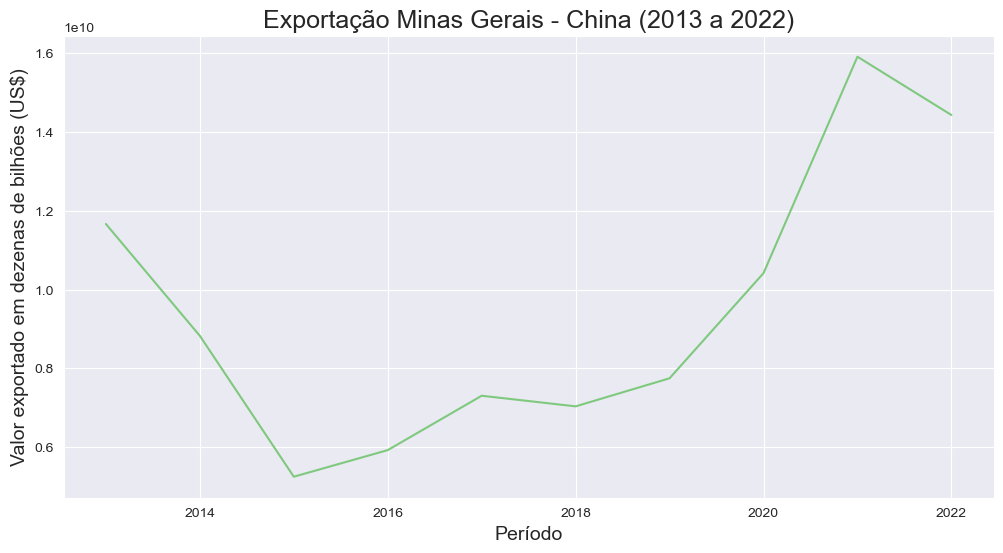

In [798]:
serie_temporal_exportacao(serie_anual_mg, 'Ano', 'Soma anual', 'Exportação Minas Gerais - China (2013 a 2022)', 'Período', 'Valor exportado em dezenas de bilhões (US$)')

### Observação II: A exportaçao de Minas Gerais à China sofreu uma queda expressiva de 2013 a 2015 caindo pela metade chegando a pouco mais de 5 bilhões, mas depois até 2022 houve uma nova tendência de alta chegando a mais de 14 billhões. 

In [799]:
exportacao_mg.head()

,Ano,Produto,Valor US$
2,2022,Minérios metálicos e sucata,8.477050e+09
6,2022,Sementes e frutos oleaginosos,2.794090e+09
16,2022,Carne e preparações de carne,1.155430e+09
20,2022,Ferro e aço,8.201460e+08
34,2022,Fertilizantes em bruto e minerais em bruto (ex...,3.767360e+08


In [800]:
exportacao_mg_invertido = pd.crosstab(exportacao_mg['Ano'], exportacao_mg.Produto, aggfunc = {sum}, values = exportacao_mg['Valor US$'])

In [801]:
x = exportacao_mg_invertido['sum']
s = x.sum()
exportacao_mg_invertido = x[s.sort_values(ascending=False).index]
exportacao_mg_invertido

Produto,Minérios metálicos e sucata,Sementes e frutos oleaginosos,Ferro e aço,Carne e preparações de carne,Celulose e resíduos de papel,"Açúcares, preparações de açúcar e mel","Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas",Produtos químicos inorgânicos,"Café, chá, cacau, especiarias, e respectivos produtos","Produtos metálicos, n.e.p.",...,Plásticos em formas não primárias,"Móveis e suas partes; roupas de cama, colchões, suportes de colchão, almofadas e semelhantes",Bebidas,"Pescado (exceto mamíferos marinhos),crustáceos,moluscos e invertebrados aquáticos e suas preparações","Materiais de tingimento, bronzeamento e coloração","Artigos de viagem, bolsas e artefatos semelhantes",Borracha em bruto (incluindo sintética e reconstituída),"Aparelhos fotográficos, equipamentos e suprimentos e de ótica, n.e.p.; relógios",Laticínios e ovos de aves,"Papel, cartão e artigos de pasta de celulose, de papel ou de cartão"
Ano,,,,,,,,,,,,,,,,,,,,,
2013,1.013140e+10,6.180030e+08,3.376920e+08,3.863000e+06,144754000.0,251082000.0,76026000.0,164366.0,3148320.0,789935.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7.403790e+09,5.653480e+08,3.394550e+08,3.212350e+06,140761000.0,180489000.0,55680900.0,6884210.0,6180600.0,2258980.0,...,44.0,144.0,18589.0,3731.0,14412.0,NaN,NaN,NaN,NaN,NaN
2015,3.937880e+09,5.830580e+08,3.194100e+08,3.469190e+06,127734000.0,150016000.0,47613800.0,4832010.0,8593890.0,11781900.0,...,6442.0,NaN,NaN,5224.0,NaN,NaN,NaN,NaN,NaN,NaN
2016,4.430200e+09,6.655840e+08,2.769770e+08,1.182410e+08,165868000.0,127993000.0,47596800.0,6395800.0,6866480.0,18900900.0,...,9.0,25839.0,NaN,13305.0,NaN,NaN,22.0,1223.0,NaN,NaN
2017,5.412660e+09,8.830390e+08,3.561420e+08,2.750320e+08,174729000.0,3595950.0,48231700.0,75332400.0,7901520.0,8094000.0,...,435.0,NaN,NaN,NaN,NaN,NaN,149.0,NaN,NaN,NaN
2018,4.283280e+09,1.296890e+09,6.211740e+08,4.069170e+08,223726000.0,29646000.0,47536200.0,6355280.0,18317200.0,12690400.0,...,166.0,NaN,NaN,NaN,NaN,356.0,567.0,NaN,267.0,55.0
2019,4.863310e+09,9.116620e+08,8.315160e+08,6.817720e+08,208007000.0,91448100.0,55401600.0,4711810.0,20567500.0,20221200.0,...,5698.0,339.0,14572.0,NaN,524.0,3439.0,44.0,NaN,NaN,206.0
2020,6.933060e+09,1.227910e+09,1.117590e+09,6.023350e+08,170022000.0,228180000.0,52650100.0,5277130.0,22326900.0,15853300.0,...,4012.0,1937.0,NaN,NaN,2229.0,2414.0,44.0,NaN,NaN,NaN
2021,1.194950e+10,1.649120e+09,8.952740e+08,5.747870e+08,173981000.0,266218000.0,111948000.0,34567100.0,45802100.0,21902400.0,...,52610.0,29223.0,15524.0,NaN,495.0,4956.0,2854.0,NaN,NaN,NaN


C:\Users\User\AppData\Local\Temp\ipykernel_17104\469813385.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


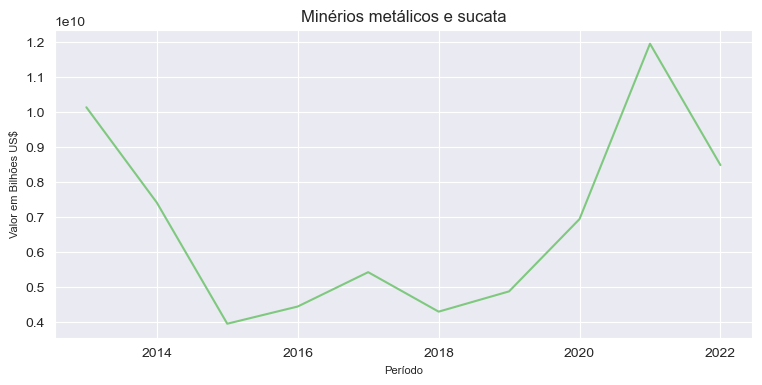

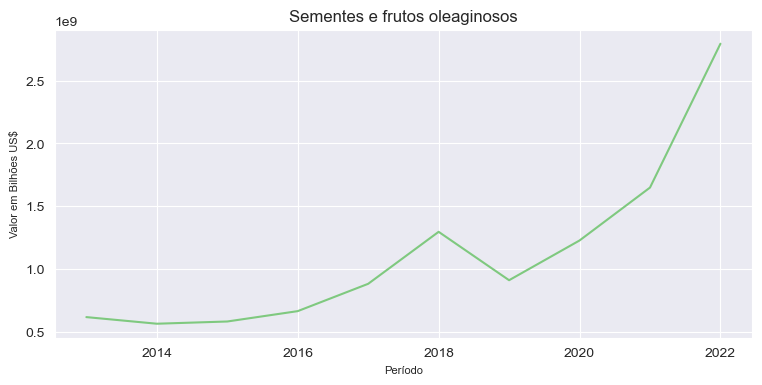

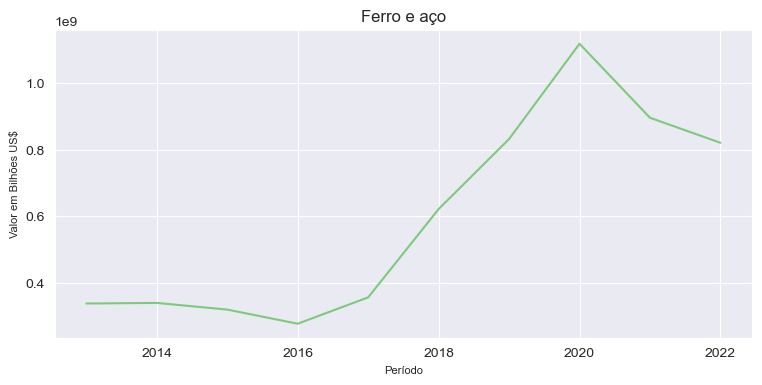

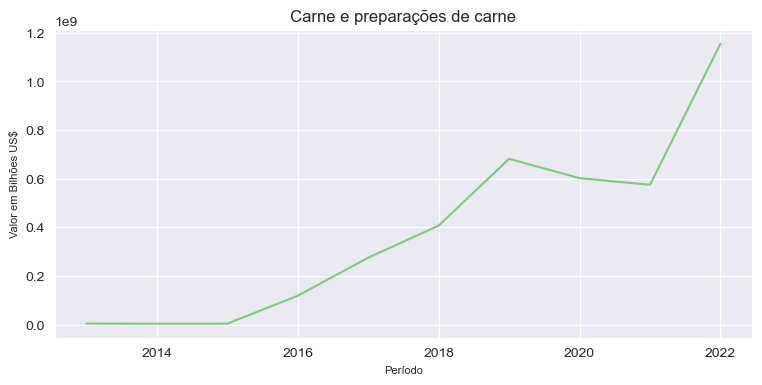

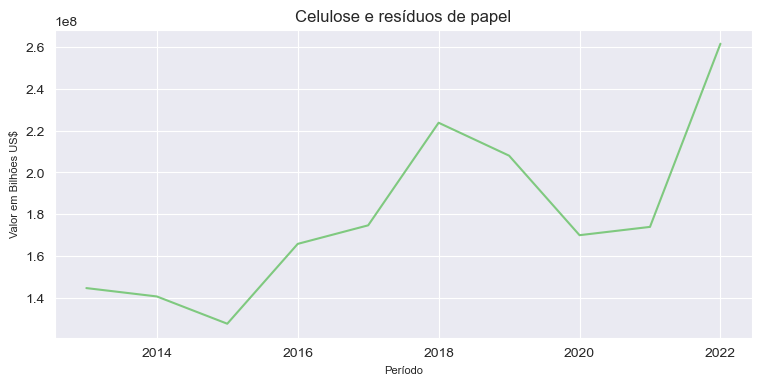

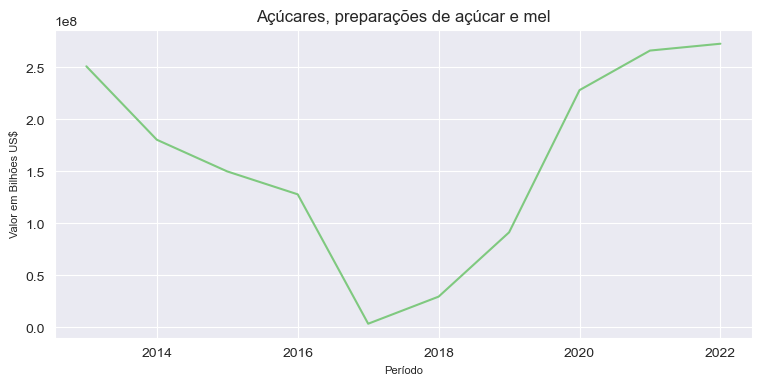

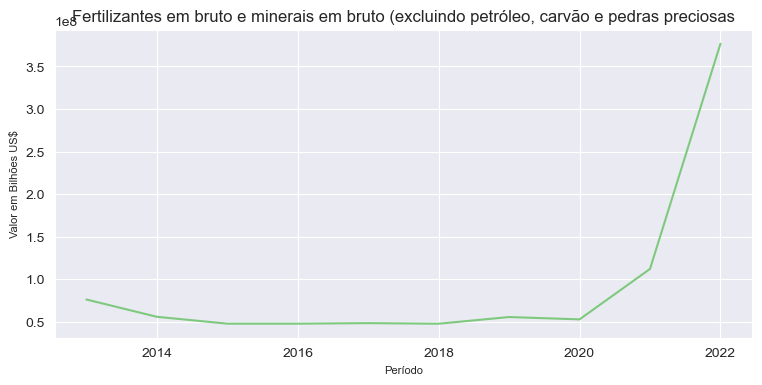

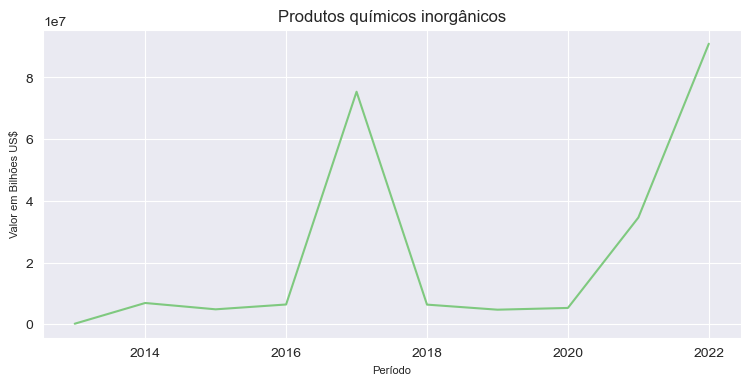

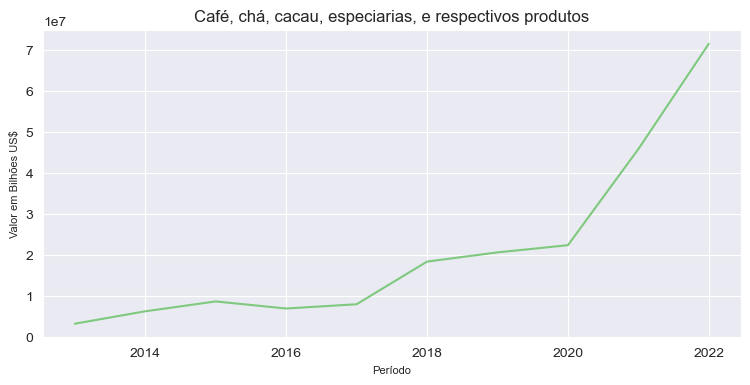

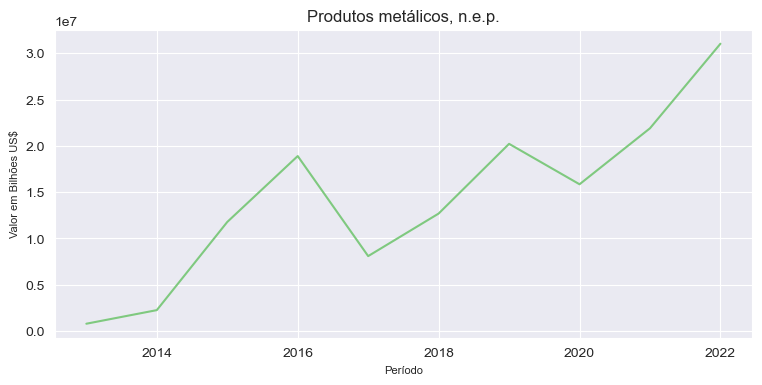

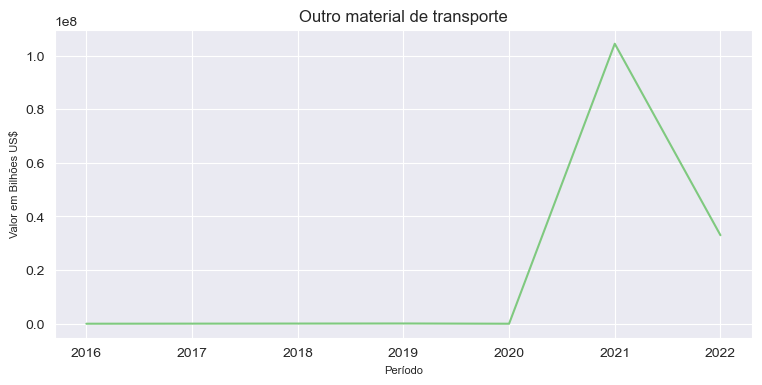

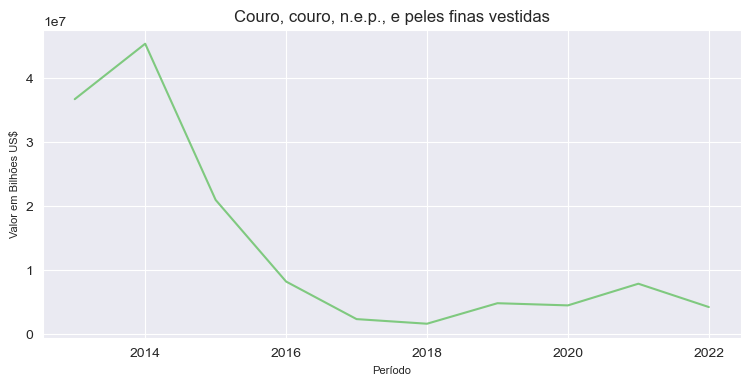

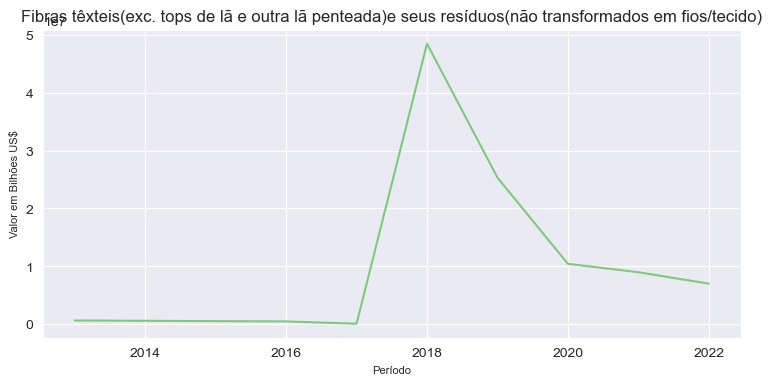

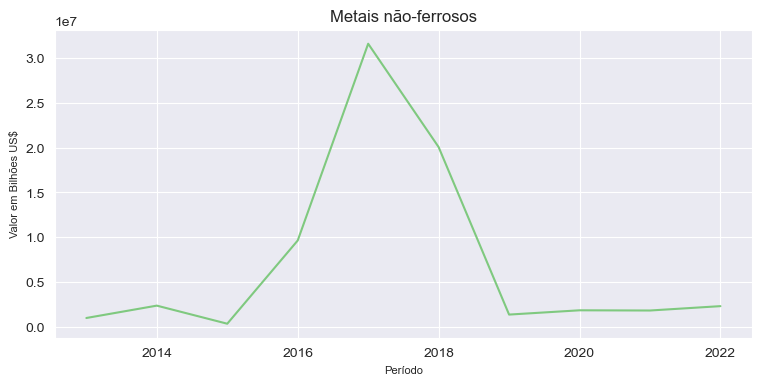

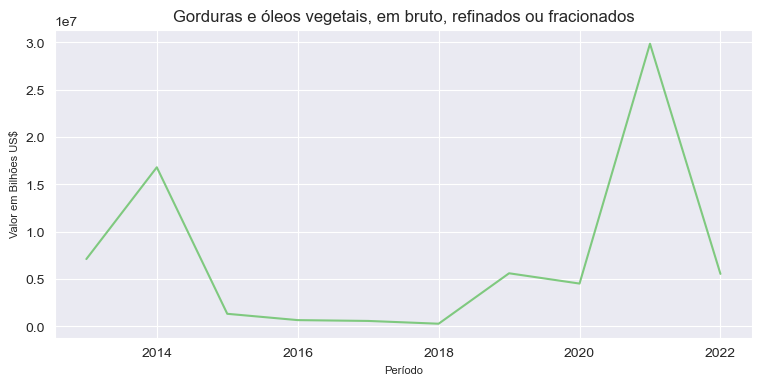

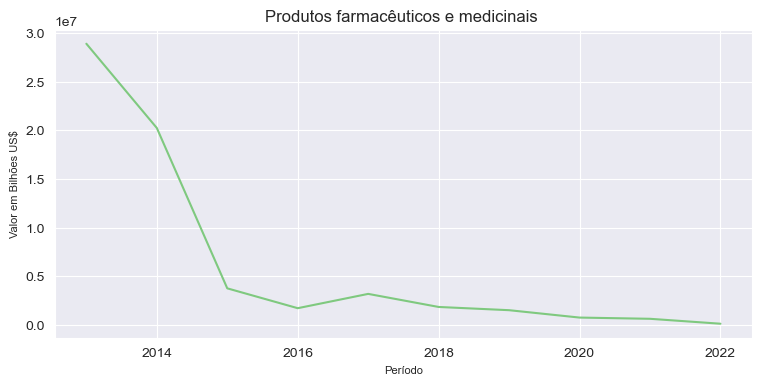

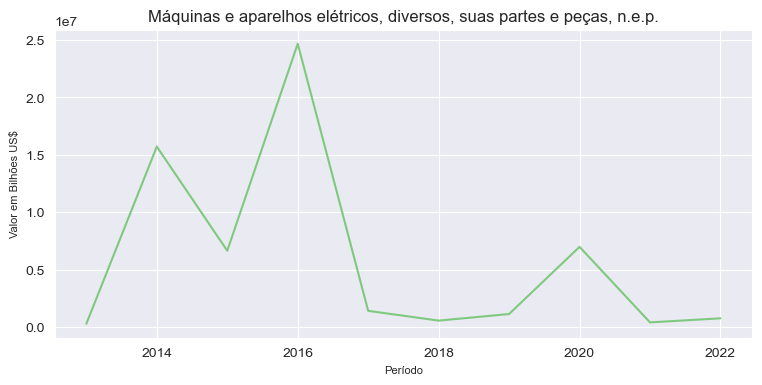

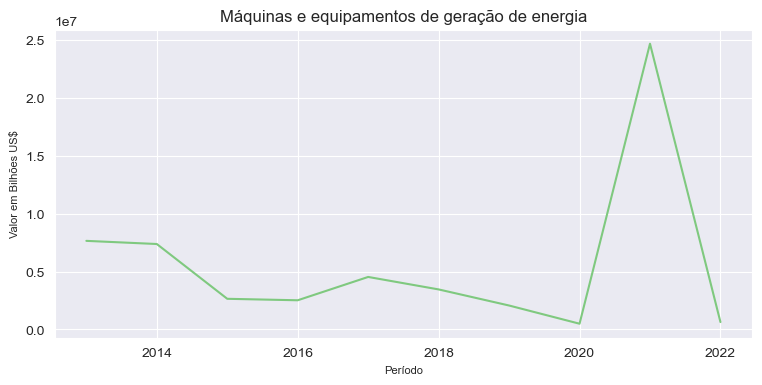

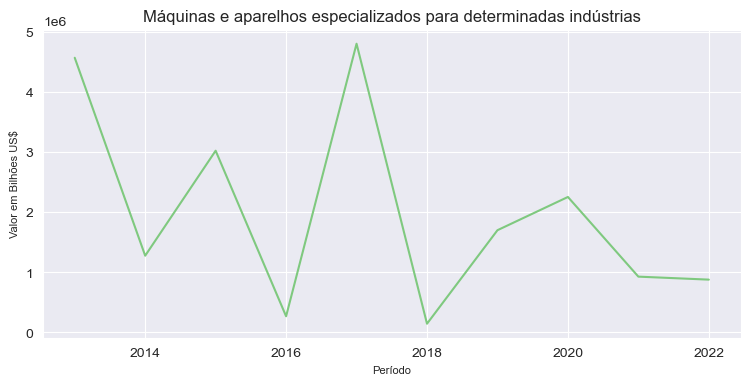

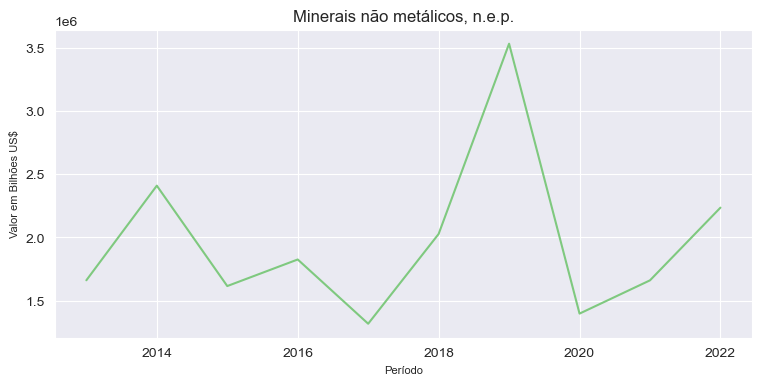

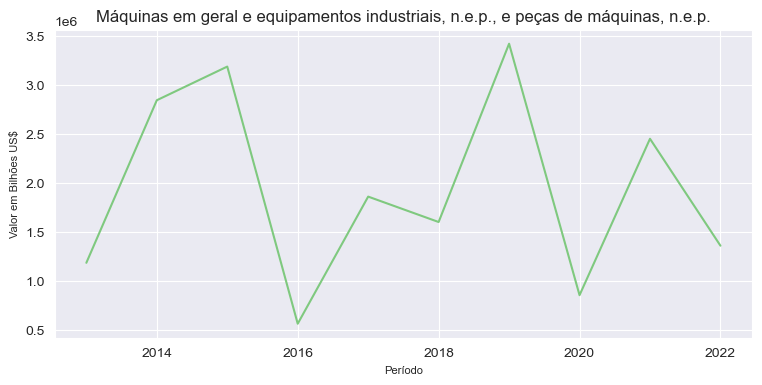

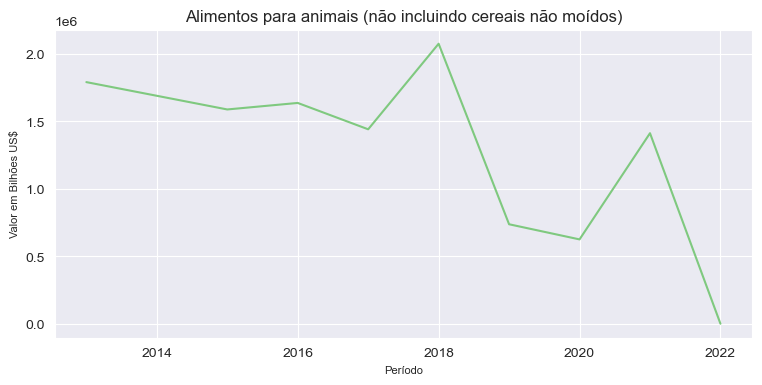

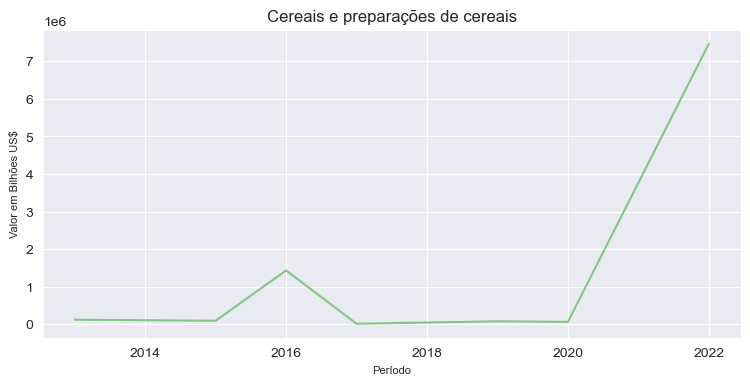

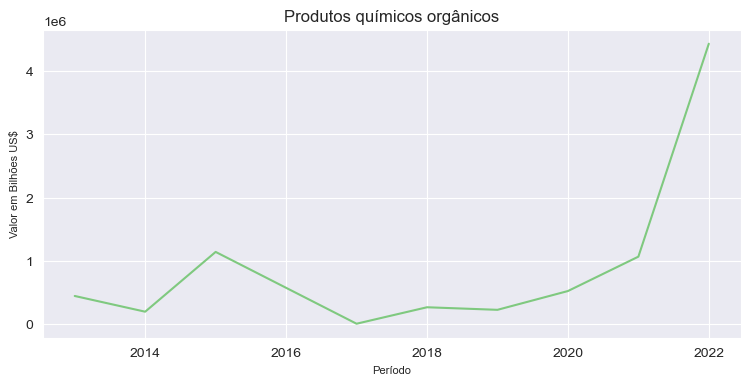

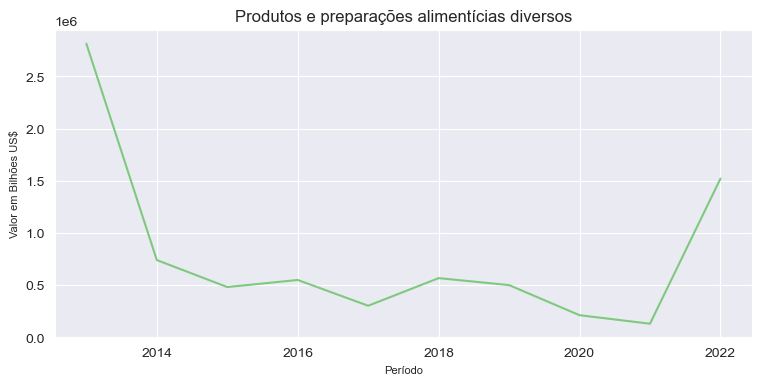

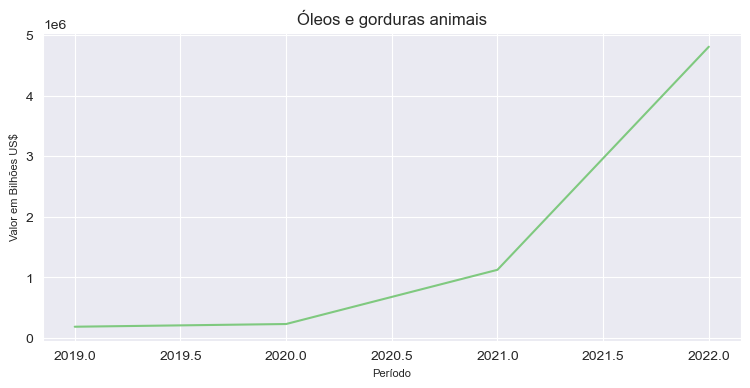

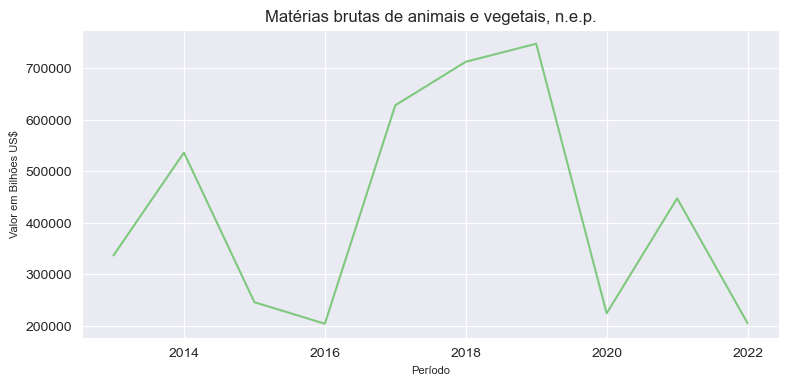

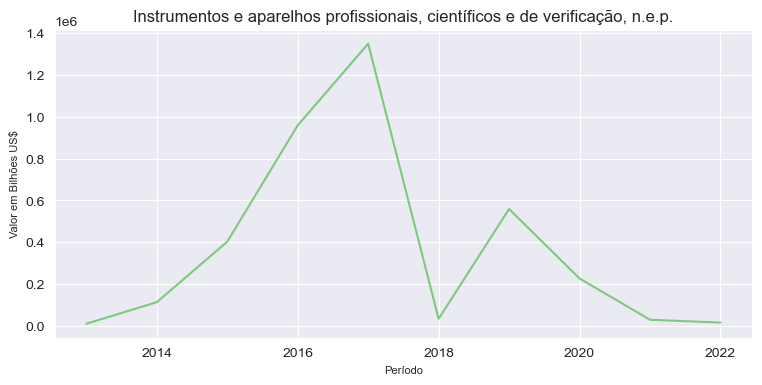

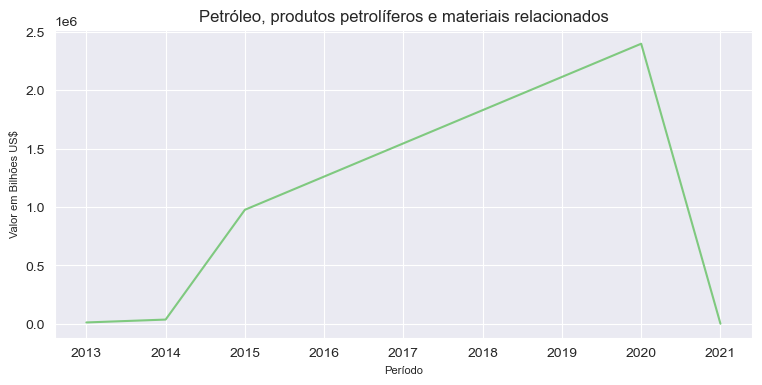

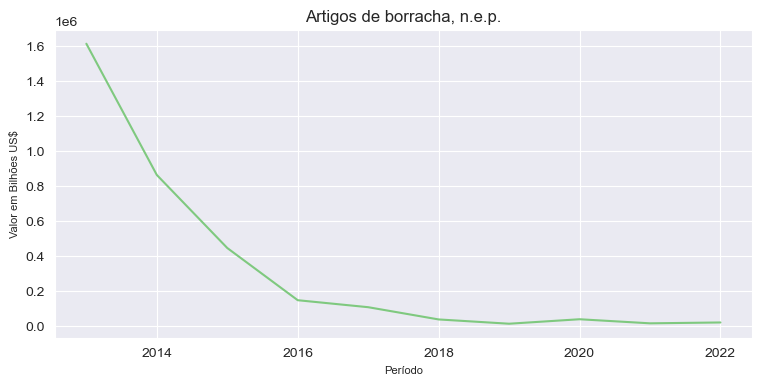

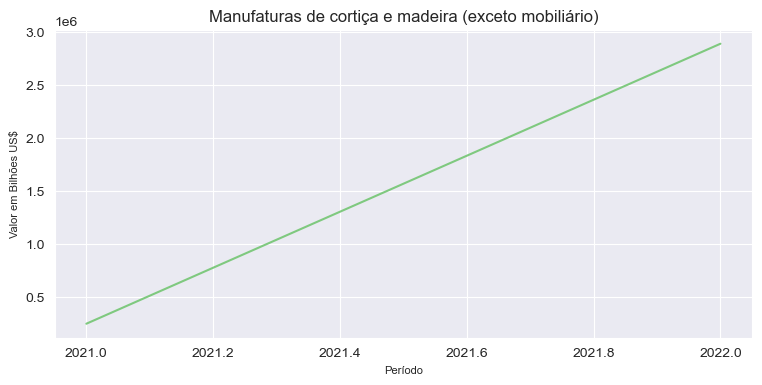

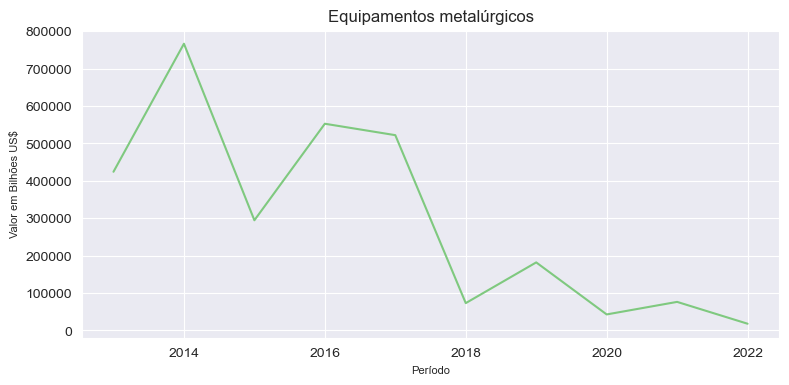

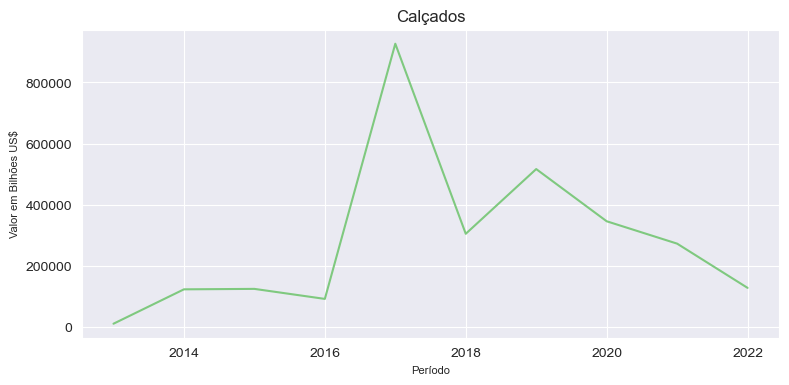

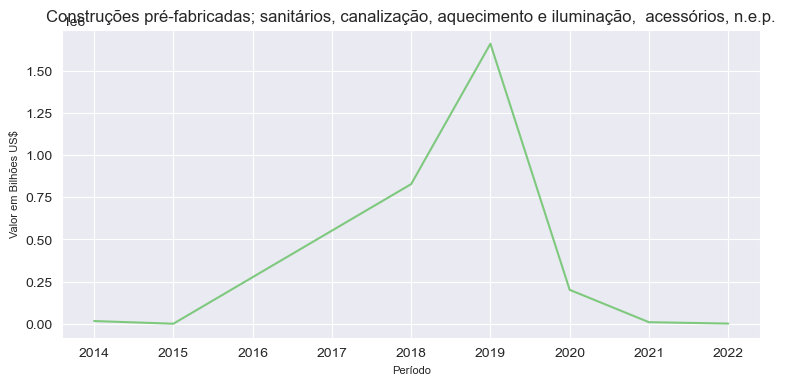

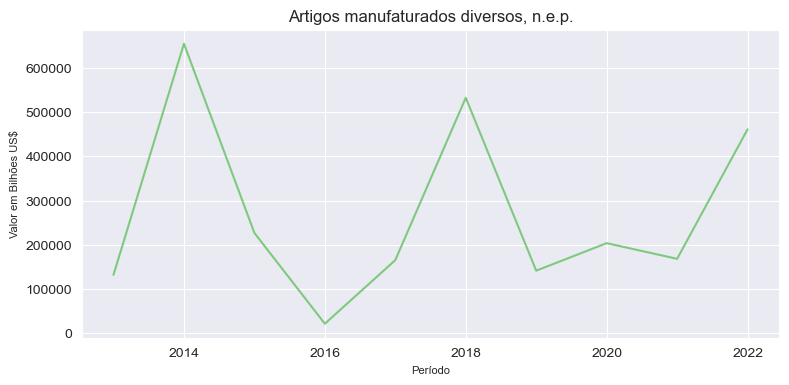

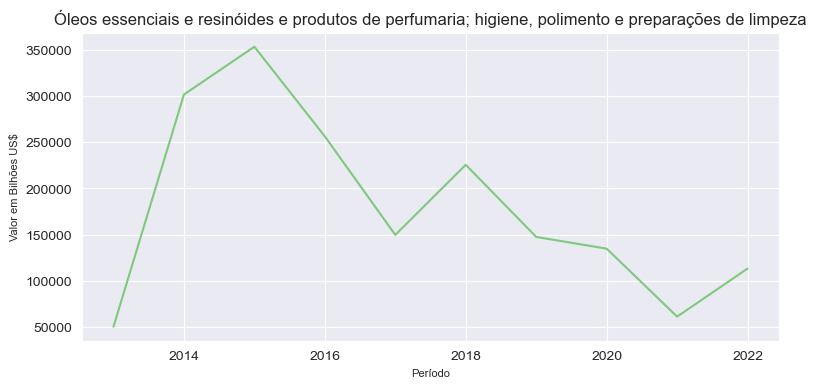

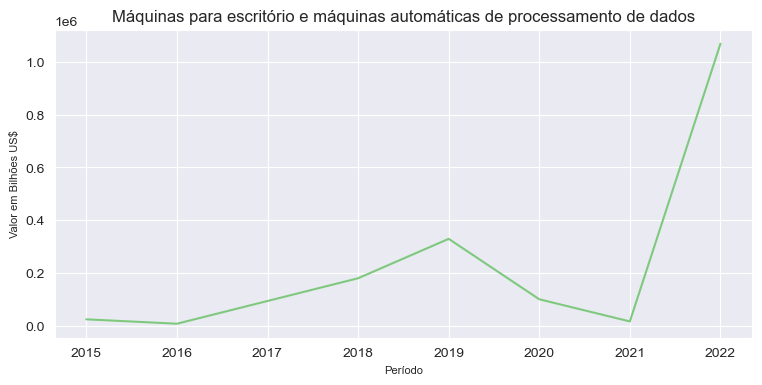

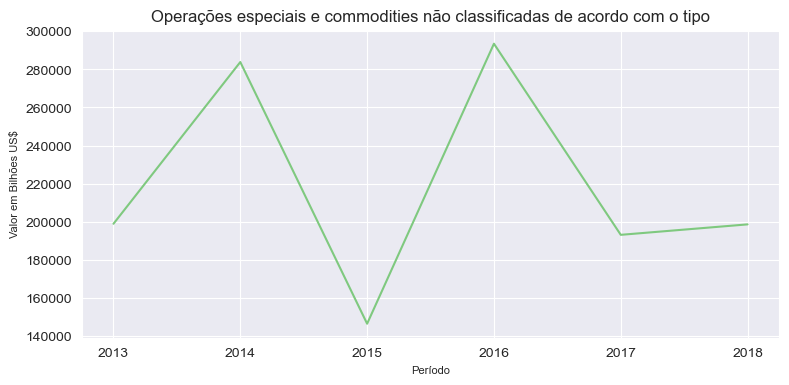

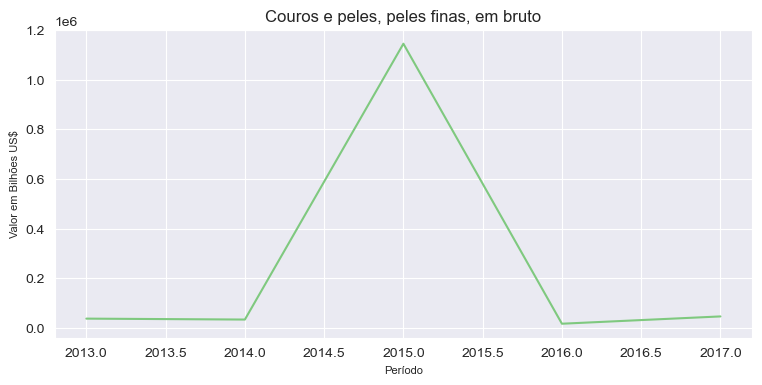

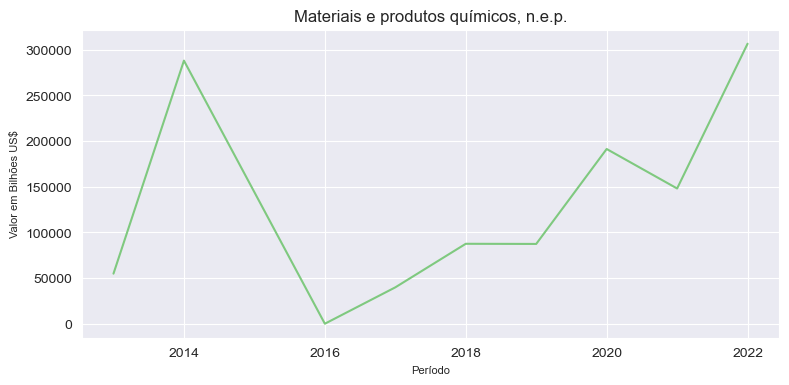

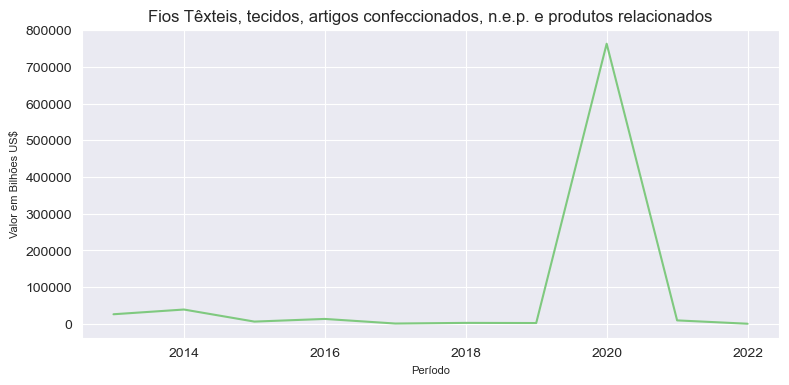

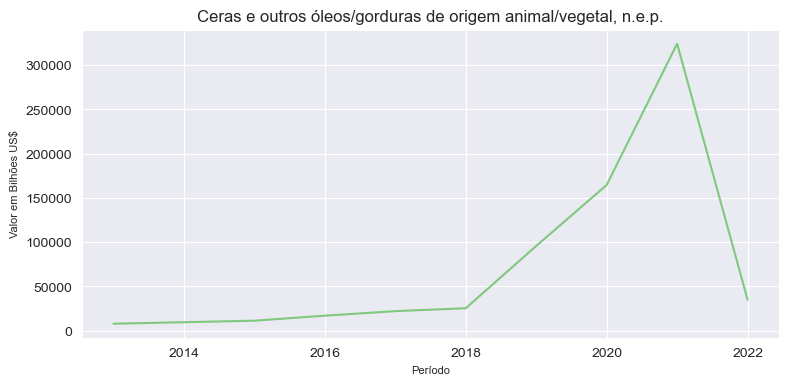

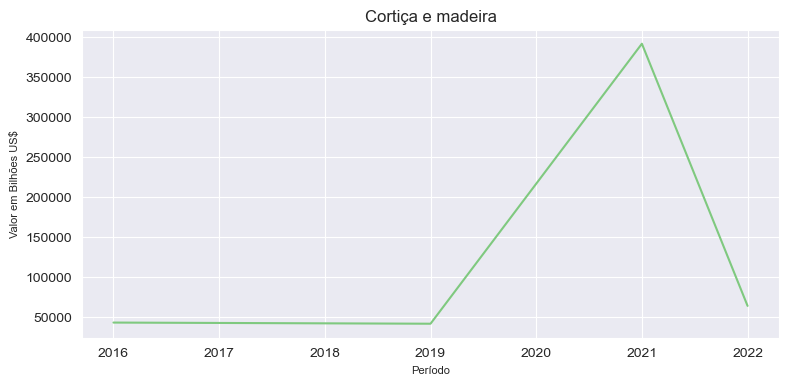

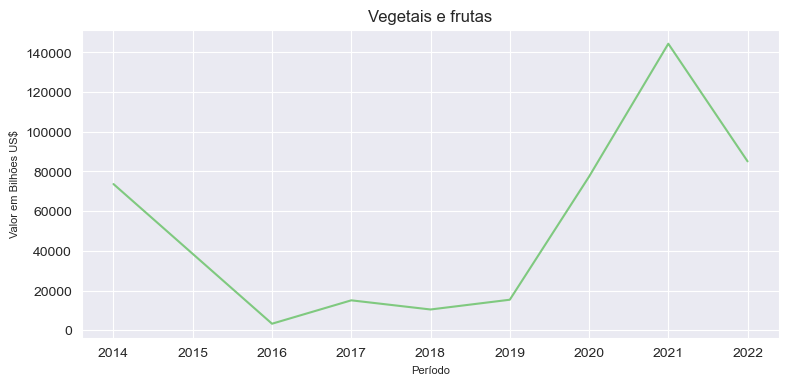

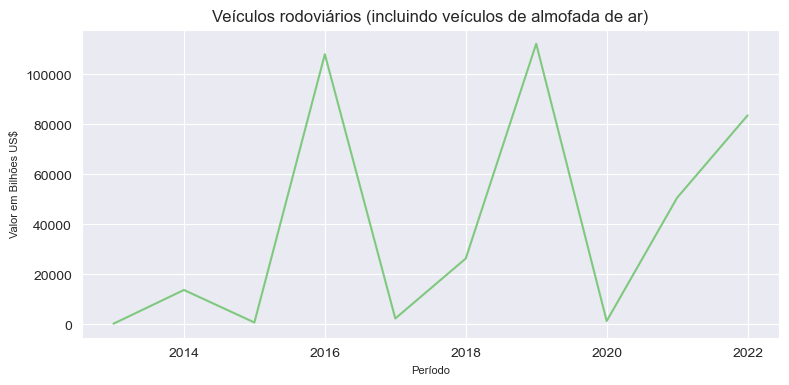

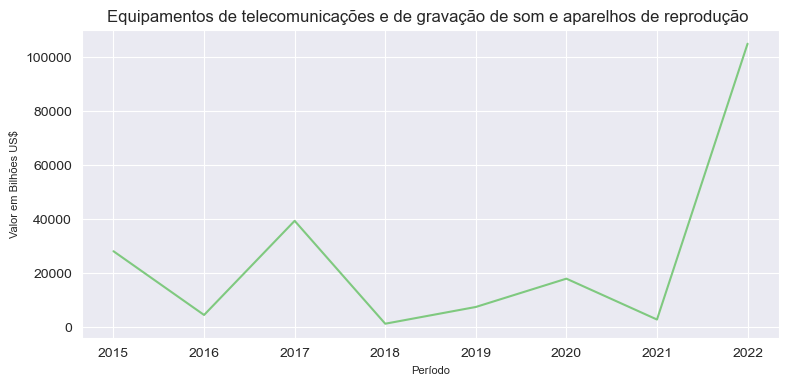

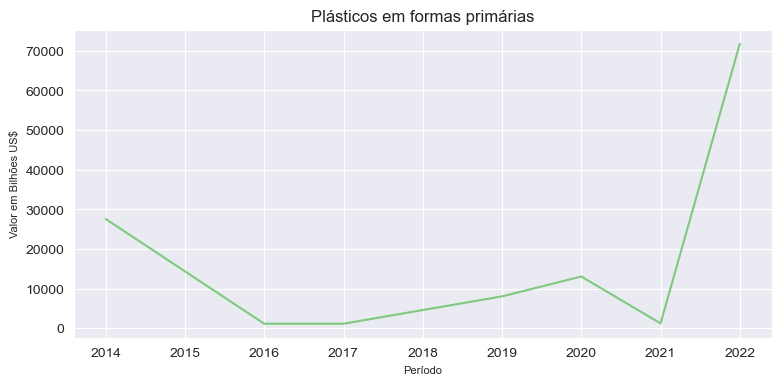

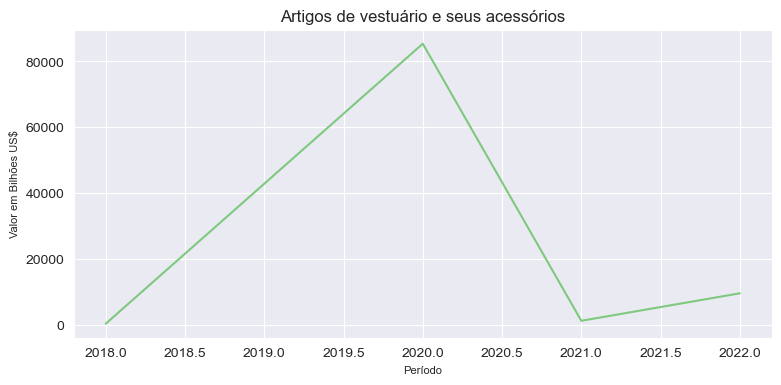

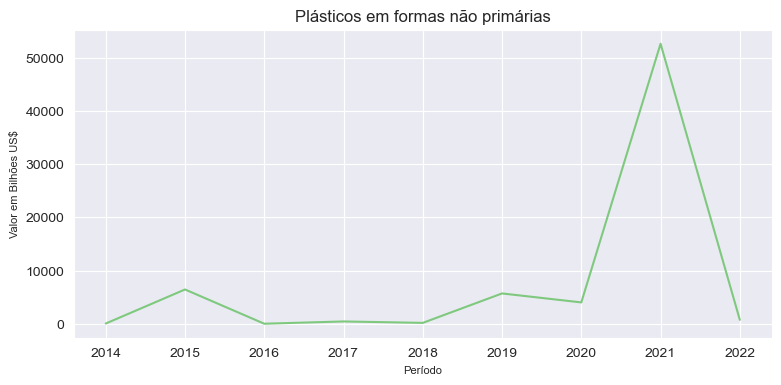

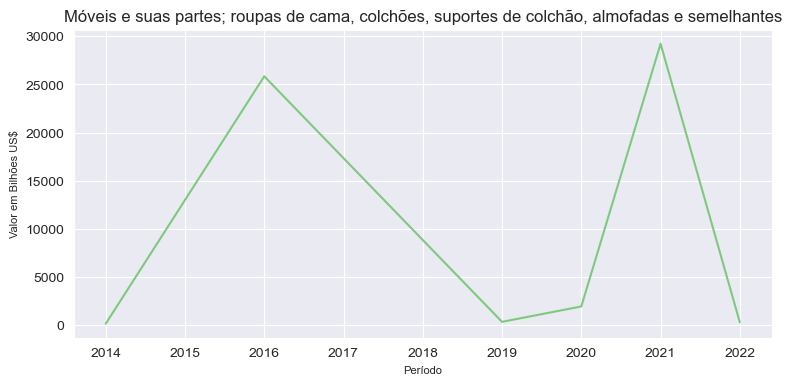

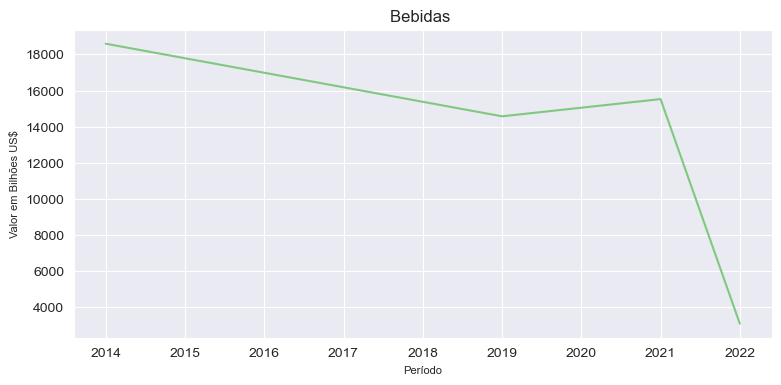

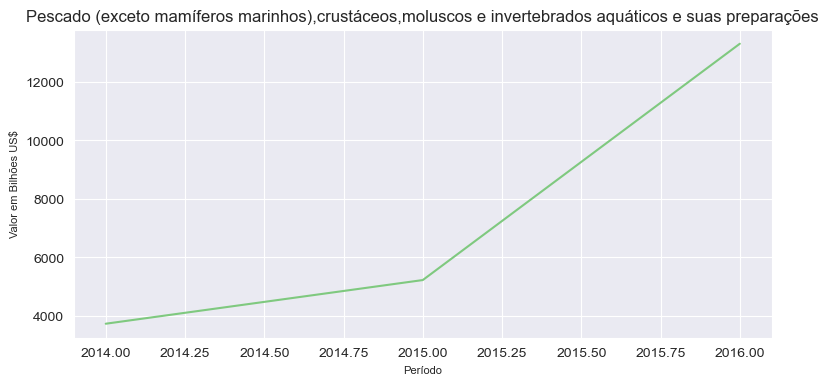

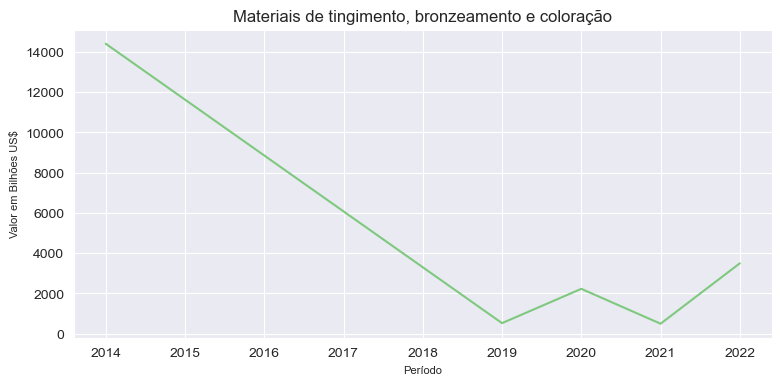

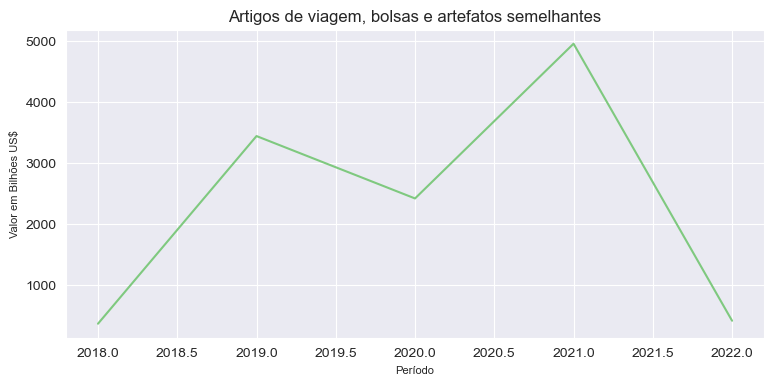

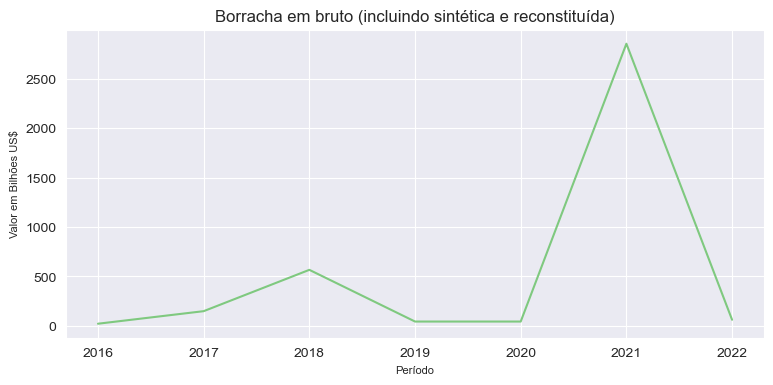

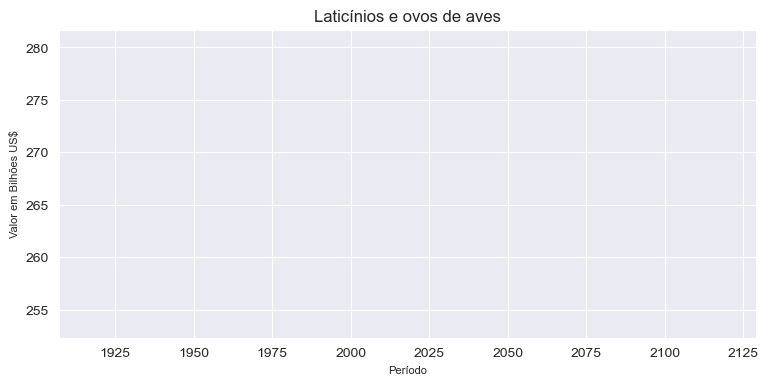

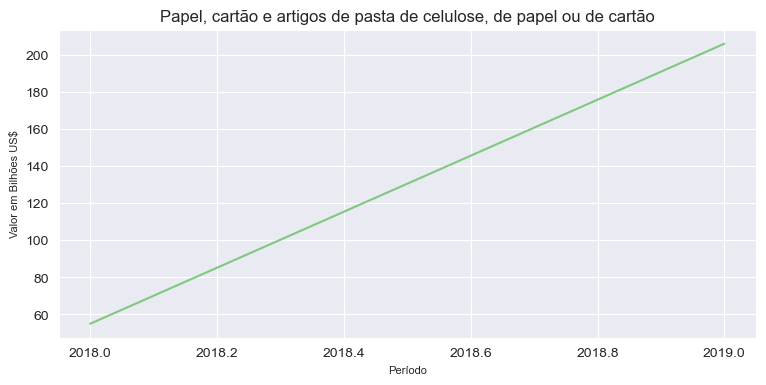

<Figure size 640x480 with 0 Axes>

In [802]:
for coluna in exportacao_mg_invertido.columns:
    if coluna != 'Aparelhos fotográficos, equipamentos e suprimentos e de ótica, n.e.p.; relógios':
        ax=sns.lineplot(data=exportacao_mg_invertido[coluna])
        sns.set_style('darkgrid')
        ax.figure.set_size_inches(9,4)
        ax.set_title(coluna, fontsize = 12)
        ax.set_xlabel('Período', fontsize = 8)
        ax.set_ylabel('Valor em Bilhões US$', fontsize = 8)
        plt.figure()

### Observação III: A mencionada queda (2013 - 2015) parece ter se dado em relação, sobretudo, a queda da exportação de mineráis metálicos e sucata, bem como de outros produtos de menor importância. Mas os crescimento depois (2015 a 2022) se deu pela recuperação e asceção do setor de mineração e metalurgia, aliado a outros produtos importantes como sementes, frutos, celulose, papel e carne. 

In [803]:
print('Os 5 principais produtos exportados são:')
exportacao_mg_invertido.transpose().head()

Os 5 principais produtos exportados são:


Ano,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Produto,,,,,,,,,,
Minérios metálicos e sucata,1.013140e+10,7.403790e+09,3.937880e+09,4.430200e+09,5.412660e+09,4.283280e+09,4.863310e+09,6.933060e+09,1.194950e+10,8.477050e+09
Sementes e frutos oleaginosos,6.180030e+08,5.653480e+08,5.830580e+08,6.655840e+08,8.830390e+08,1.296890e+09,9.116620e+08,1.227910e+09,1.649120e+09,2.794090e+09
Ferro e aço,3.376920e+08,3.394550e+08,3.194100e+08,2.769770e+08,3.561420e+08,6.211740e+08,8.315160e+08,1.117590e+09,8.952740e+08,8.201460e+08
Carne e preparações de carne,3.863000e+06,3.212350e+06,3.469190e+06,1.182410e+08,2.750320e+08,4.069170e+08,6.817720e+08,6.023350e+08,5.747870e+08,1.155430e+09
Celulose e resíduos de papel,1.447540e+08,1.407610e+08,1.277340e+08,1.658680e+08,1.747290e+08,2.237260e+08,2.080070e+08,1.700220e+08,1.739810e+08,2.614690e+08


### Observação IV: São produtos de baixo valor agregado e de baixa complexidade industrial sendo, principalmente, do setor de mineração, seguido pelo agrícola. 

In [804]:
top_5_produtos = exportacao_mg_invertido.sum()[0:5].sum()
todos_produtos = exportacao_mg_invertido.sum().sum()

In [805]:
porcentagem_principais_produtos = ((top_5_produtos/todos_produtos)*100).round(2)
print(f"Os 5 principais produtos exportados de MG à China equivalem a {porcentagem_principais_produtos}% das exportações de 2013 a 2022.")

Os 5 principais produtos exportados de MG à China equivalem a 95.82% das exportações de 2013 a 2022.


### Observação V: A perenidade dos produtos que não fazem parte dos 5 principais produtos exportados por Minas Gerais não tem grande impacto no volume total, como observado pelos gráficos, porque os 5 principais equivalem a 95.82% das exportações totais, levendo em conta os dados no período analisado. 

##### # Criando uma função para criar as porcentagens e colocá-las em uma lista para poder usar nos gráficos de pizza 

In [806]:
def criando_porcentagem(referencia_1, referencia_2):
    divisao = referencia_2/referencia_1
    lista_porcentagem = []
    for valor in divisao:
        lista_porcentagem.append(int((valor)*100))
    lista_porcentagem = lista_porcentagem    
    return lista_porcentagem

In [807]:
lista = criando_porcentagem(serie_anual_br['Soma anual'], serie_anual_mg['Soma anual'])

##### # Criando gráficos de pizza em sequência por ano

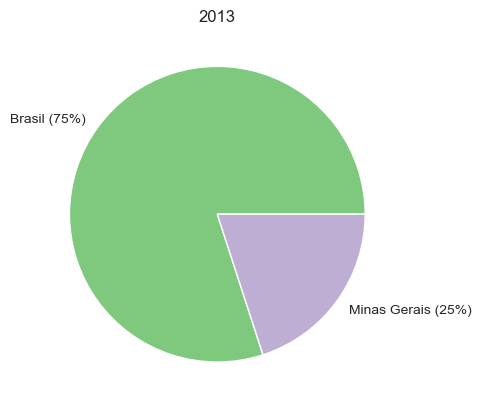

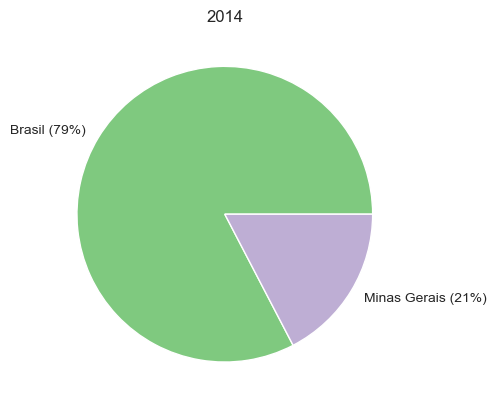

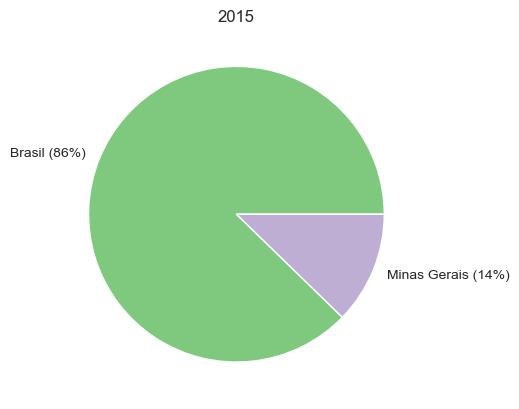

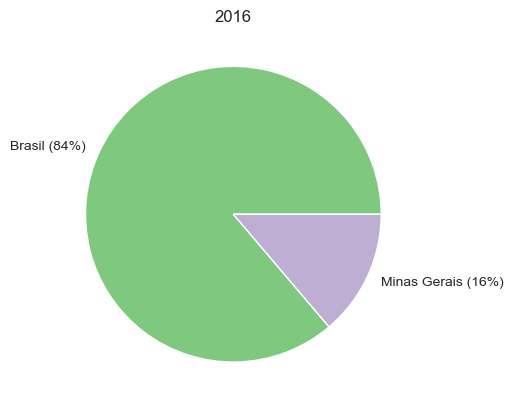

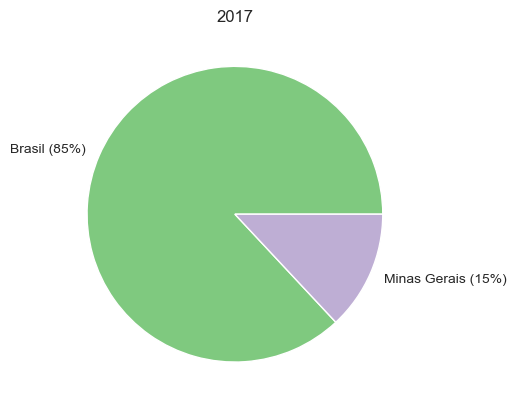

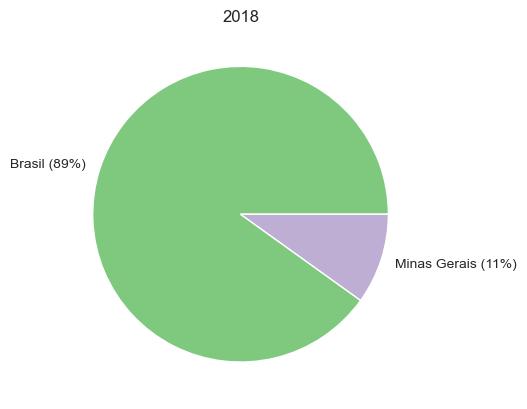

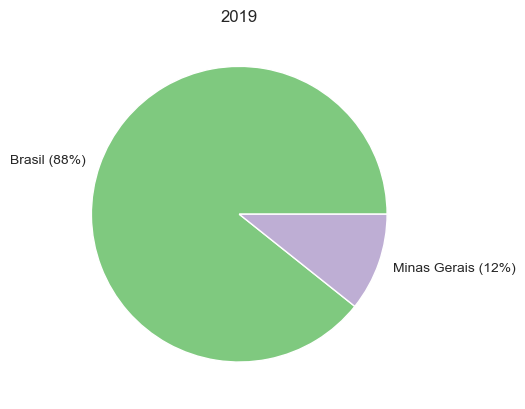

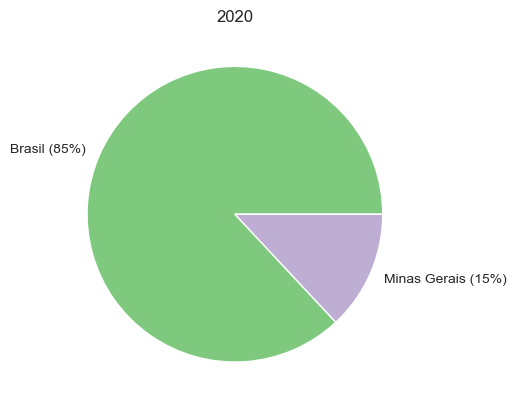

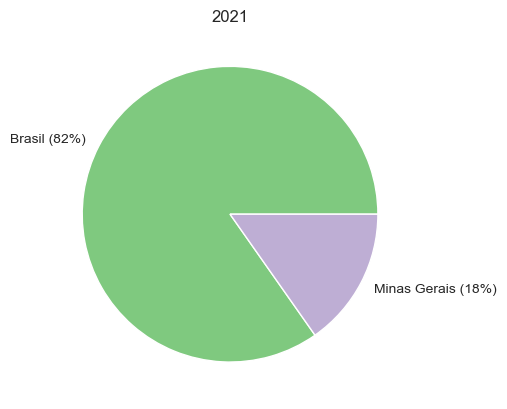

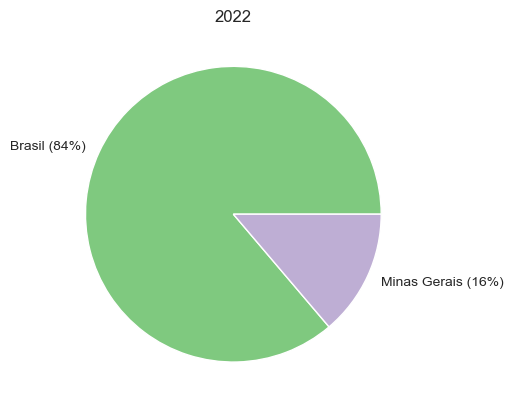

<Figure size 640x480 with 0 Axes>

In [808]:
data = 2013 - 1
for valor in lista:
    data += 1
    plt.title(data, fontsize = 12)
    mylabels = [f"Brasil ({100 - valor}%)", f"Minas Gerais ({valor}%)"]
    x = (np.array([100, + valor]))
    plt.pie(x, labels = mylabels)
    plt.figure() 

### Observação VI: A partifipação de Minas Gerais na exportação brasileira à China perdeu importância no período de queda (2013 - 2015), e depois teve uma pequena recuperação. 

In [809]:
x = exportacao_mg_invertido.transpose().head()
minerios_metalicos_sucata = x[0:1].transpose()
sementes_frutos_oleaginosos = x[1:2].transpose()
ferro_aco = x[2:3].transpose()
carne_preparacoes_carne = x[3:4].transpose()
celulose_residuos_papel = x[4:5].transpose()

##### # Definindo uma função para calcular o aumento e a aceleração dos 5 principais produtos 

In [810]:
def calcular_aceleracao_aumento(dataframe, nome_dataframe):
    dataframe['aumento'] = dataframe[nome_dataframe].diff()
    dataframe['aceleracao'] = dataframe['aumento'].diff()
    return dataframe

##### # Definindo uma função para verificar os crescimento da exportação dos 5 pricipais produtos

In [811]:
def plot_comparacao(x, y1, y2, dataset, titulo):
    plt.figure(figsize=(10,6))
    ax = plt.subplot(2,1,1)
    plt.title(titulo)
    plt.subplot(2,1,1)
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(2,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    ax=ax

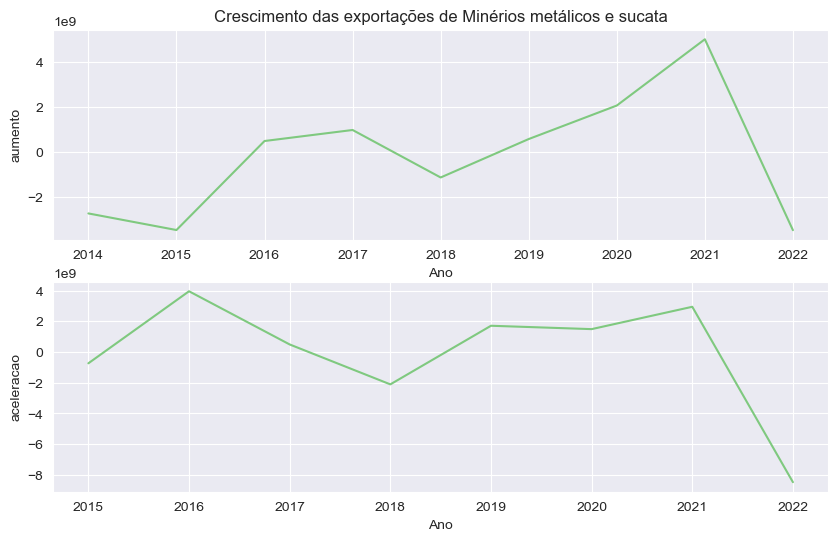

In [812]:
calcular_aceleracao_aumento(minerios_metalicos_sucata, 'Minérios metálicos e sucata')
plot_comparacao(minerios_metalicos_sucata.index, 'aumento', 'aceleracao', minerios_metalicos_sucata, 'Crescimento das exportações de Minérios metálicos e sucata')

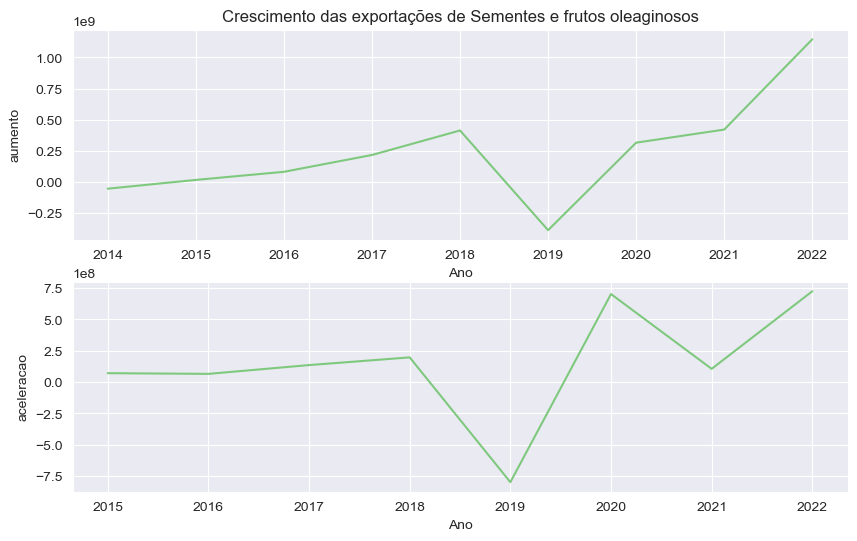

In [813]:
calcular_aceleracao_aumento(sementes_frutos_oleaginosos, 'Sementes e frutos oleaginosos')
plot_comparacao(carne_preparacoes_carne.index, 'aumento', 'aceleracao', sementes_frutos_oleaginosos, 'Crescimento das exportações de Sementes e frutos oleaginosos')

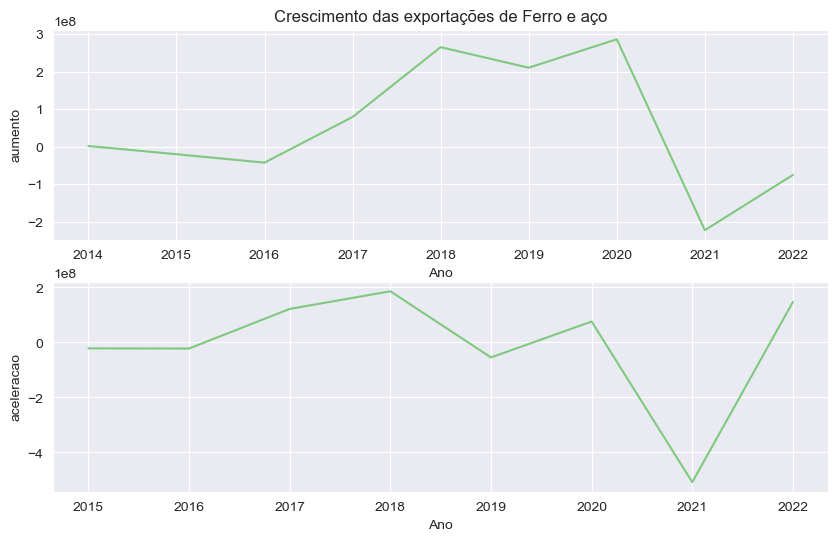

In [814]:
calcular_aceleracao_aumento(ferro_aco, 'Ferro e aço')
plot_comparacao(ferro_aco.index, 'aumento', 'aceleracao', ferro_aco, 'Crescimento das exportações de Ferro e aço')

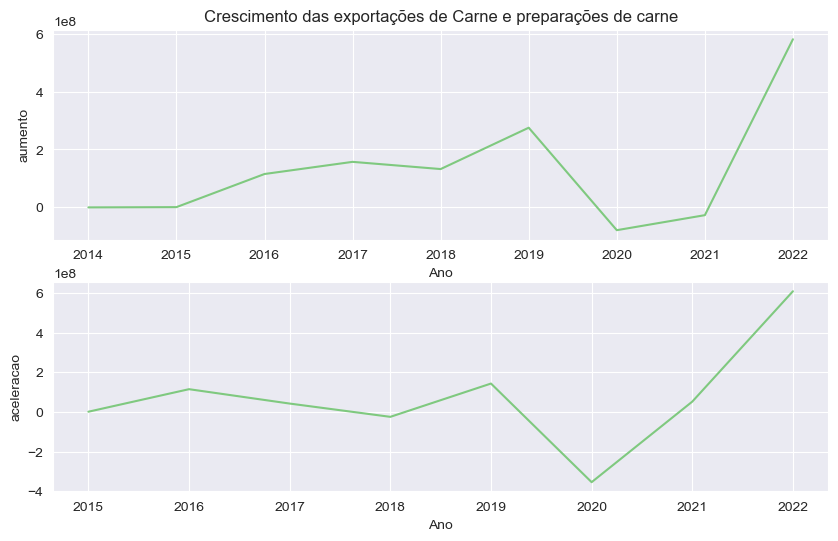

In [815]:
calcular_aceleracao_aumento(carne_preparacoes_carne, 'Carne e preparações de carne')
plot_comparacao(carne_preparacoes_carne.index, 'aumento', 'aceleracao', carne_preparacoes_carne, 'Crescimento das exportações de Carne e preparações de carne')

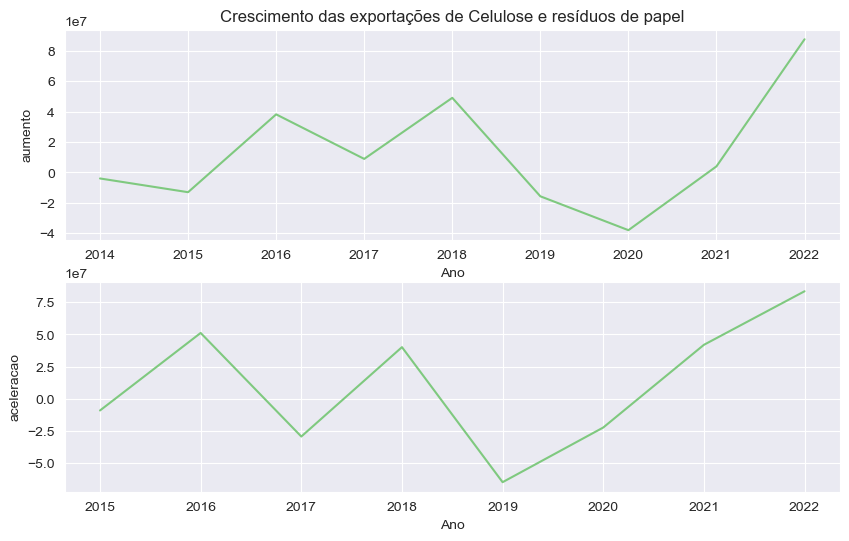

In [816]:
calcular_aceleracao_aumento(celulose_residuos_papel, 'Celulose e resíduos de papel')
plot_comparacao(celulose_residuos_papel.index, 'aumento', 'aceleracao', celulose_residuos_papel, 'Crescimento das exportações de Celulose e resíduos de papel')

### Obersevação VII: Os três produtos que apresentaram um crescimento maior e mais acelerado nesses 10 anos, foram ''Sementes e frutos oleaginosos'' e ''Celulose e resíduos de papel" e ''Carne e preparações de carne", pois os do setor de mineração e metalurgia deram uma leve desacelerada nos últimos anos. 

In [817]:
pib_mg

,ANO,PIB
0,2022,950800000000
1,2021,805500000000
2,2020,682786000000
3,2019,651870000000
4,2018,614876000000
5,2017,573700000000
6,2016,544600000000
7,2015,519300000000
8,2014,516630000000
9,2013,486960000000


In [830]:
exp_mg = pd.DataFrame({
    "ANO":[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013],
    "PIB":[int(i) for i in serie_anual_mg['Soma anual']][::-1]
})
exp_mg

,ANO,PIB
0,2022,14433164425
1,2021,15913028535
2,2020,10416107840
3,2019,7745598372
4,2018,7032762453
5,2017,7302433512
6,2016,5921556609
7,2015,5245623333
8,2014,8823544876
9,2013,11664653443


In [833]:
correlacao = exp_mg.corrwith(pib_mg, axis = 0)
print("A correlação do crescimento do PIB de MG e as exportações mineiras para a China é de {}, ou seja, uma correlação considerável em 10 anos, sendo 1 uma correlação perfeita.".format(correlacao[1]))

A correlação do crescimento do PIB de MG e as exportações mineiras para a China é de 0.7228415177857342, ou seja, uma correlação considerável em 10 anos, sendo 1 uma correlação perfeita.


### Observação VIII:  Existe uma correlação considerável entre o PIB de Minas Gerais e as exportações feitas à China, mostrando a importância desse parceiro comercial para o estado. 